# $$ Scientific \text{ } Computing \text{ } with \text{ } Python: \text{ } Group \text{ } 3 \text{ } Final \text{ } Project $$
# $$California \text{ } Mall \text{ } Customer \text{ } Sales \text{ } Analysis$$
Due Time: December 11th

Name: **Muyang Huang**, **Mian Jiang**

Please turn in a report in Jupyter Notebook file containing
- Python code with comments
- Necessary Markdown write-up

## 1. Introductions

In [1]:
# Writing some introductions

This project aims to analyze and identify trends and insights in customer demographics, sales performance, and mall characteristics for shopping malls in major metropolitan regions across California (San Francisco, Los Angeles, and San Diego). By revealing the distribution and trend of consumption patterns in the area from 2021 to 2023, our findings might further provide valuable decision-making insights for governors and business owners.

## 2. Materials and Methods

### 2.1 Dataset Description

California Mall Customer Sales Dataset from https://www.kaggle.com/datasets/captaindatasets/istanbul-mall

1.	Sales Data: Contains transaction details such as invoice_no, customer_id, category, quantity, invoice date, price, and shopping_mall. This data allows us to analyze sales trends, product popularity, and mall performance.
2.	Customer Data: Provides demographic information (customer_id, gender, age, and payment_method) to support customer segmentation and uncover demographic-based spending trends and payment preferences.
3.	Shopping Mall Data: Describes mall characteristics like shopping_mall, construction_year, area_sqm, location, and stores_count, enable analyzing how mall attributes (size, age, location) influence customer traffic and sales.

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# import folium
# from folium.plugins import HeatMap
from scipy import stats
from ipyleaflet import Map, Marker, CircleMarker, Popup
from ipywidgets import SelectionSlider, VBox, interact, HTML
import pandas as pd

In [17]:
# Loading the datasets
sales_data = pd.read_csv('data/sales_data.csv')
customer_data = pd.read_csv('data/customer_data.csv')
shopping_mall_data = pd.read_csv('data/shopping_mall_data.csv')

In [18]:
print("We have {} rows for sales data".format(len(sales_data)))
print("We have {} rows for customer data".format(len(customer_data)))
print("We have {} rows for shopping mall data".format(len(shopping_mall_data)))

We have 99457 rows for sales data
We have 99457 rows for customer data
We have 10 rows for shopping mall data


In [19]:
shopping_mall_data.head()

,shopping_mall,construction_year,area (sqm),location,store_count,lat,lon
0,South Coast Plaza,1967,250000,Costa Mesa,270,33.6910,-117.8890
1,Westfield Valley Fair,1986,220000,Santa Clara,230,37.3255,-121.9456
2,The Grove,2002,56000,Los Angeles,140,34.0719,-118.3575
3,Westfield Century City,1964,133000,Los Angeles,200,34.0587,-118.4190
4,Beverly Center,1982,111000,Los Angeles,160,34.0752,-118.3774


In [20]:
# Handling Missing Data
# Identify missing values
print("The names of the variables and the corresponding number of missing values in the seles data:")
print(sales_data.isnull().sum())
print("")
print("The names of the variables and the corresponding number of missing values in the customer data:")
print(customer_data.isnull().sum())
print("")
print("The names of the variables and the corresponding number of missing values in the shopping mall data:")
print(shopping_mall_data.isnull().sum())
print("")

The names of the variables and the corresponding number of missing values in the seles data:
invoice_no       0
customer_id      0
category         0
quantity         0
invoice date     0
price            0
shopping_mall    0
dtype: int64

The names of the variables and the corresponding number of missing values in the customer data:
customer_id         0
gender              0
age               119
payment_method      0
dtype: int64

The names of the variables and the corresponding number of missing values in the shopping mall data:
shopping_mall        0
construction_year    0
area (sqm)           0
location             0
store_count          0
lat                  0
lon                  0
dtype: int64



In [21]:
# Writing some descriptions

In [22]:
# Drop rows with missing values in the 'age' column
customer_data = customer_data.dropna(subset=['age'])

# Fill missing numerical values with median
# customer_data['age'] = customer_data['age'].fillna(customer_data['age'].median())

# Verify the changes
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99338 non-null  object 
 1   gender          99338 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99338 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.8+ MB
None


In [23]:
# Writing some descriptions

In [24]:
# Handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

sales_data_without_outliers = remove_outliers(sales_data, 'price')

In [25]:
# Summary of cleaned datasets
print(sales_data_without_outliers.info())
print("")
print(customer_data.info())
print("")
print(shopping_mall_data.info())
print("")

<class 'pandas.core.frame.DataFrame'>
Index: 94433 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     94433 non-null  object 
 1   customer_id    94433 non-null  object 
 2   category       94433 non-null  object 
 3   quantity       94433 non-null  int64  
 4   invoice date   94433 non-null  object 
 5   price          94433 non-null  float64
 6   shopping_mall  94433 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99338 non-null  object 
 1   gender          99338 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99338 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.8+ MB
None

<c

In [27]:
# Save cleaned datasets
sales_data_without_outliers.to_csv('data_cleaned/cleaned_sales_data.csv', index=False)
customer_data.to_csv('data_cleaned/cleaned_customer_data.csv', index=False)
shopping_mall_data.to_csv('data_cleaned/cleaned_shopping_mall_data.csv', index=False)

In [ ]:
# Use Shapiro-Wilk Test (scipy.stats.shapiro) to test the null hypothesis that the data is normally distributed.
# Do we really need that?

In [28]:
# Exploratory display of the sales data
sales_data["invoice date"] = pd.to_datetime(sales_data["invoice date"])
sale_date = sales_data.groupby(["shopping_mall", "invoice date"], as_index=False)["price"].sum()
sale_with_coord = pd.merge(sale_date, shopping_mall_data, how='left', on='shopping_mall')[['shopping_mall', 'invoice date', 'price', 'lon', 'lat']]

# 提取所有日期
dates = sorted(sale_with_coord["invoice date"].dt.strftime("%Y-%m-%d").unique())

# 获取每个x的经纬度
locations = sale_with_coord.groupby('shopping_mall')[["lat", "lon"]].first().reset_index()

# 创建地图
m = Map(center=(36.7783, -119.4179), zoom=6)

# 创建滑动条
slider = SelectionSlider(
    options=dates,
    value=dates[0],
    description="Date:",
    continuous_update=True
)

# 创建动态更新函数
circles = {}  # 用于存储地图上的 CircleMarker 对象

def update_map(selected_date):
    # 清理旧的 CircleMarker
    for circle in circles.values():
        m.remove_layer(circle)
    circles.clear()
    
    # 获取选中日期的汇总数据
    current_data = sale_with_coord[sale_with_coord["invoice date"] == pd.to_datetime(selected_date)]
    for _, row in current_data.iterrows():
        x = row["shopping_mall"]
        z_value = row["price"]
        loc = locations[locations["shopping_mall"] == x]
        latitude = loc["lat"].values[0]
        longitude = loc["lon"].values[0]

        # 创建 CircleMarker
        circle = CircleMarker(
            location=(latitude, longitude),
            radius=int(z_value / 1000),  # 根据z值调整圆的大小
            color="blue",
            fill_color="blue",
            fill_opacity=0.7,
            #popup=f"{x}: {z_value}"
        )
        circles[x] = circle
        m.add_layer(circle)

# 滑动条事件绑定
def on_slider_change(change):
    update_map(change["new"])

slider.observe(on_slider_change, names="value")

# 显示初始地图和滑动条
update_map(dates[0])  # 初始化地图

# interact(lambda index: update_map(index), index=slider)
VBox([slider, m])


### 2.2 Hypotheses
To achieve our objective, we propose conducting hypothesis testing regarding the following perspectives:

#### Geographical Divergence
$H_0$: All of the malls from different metropolitan areas were performing the same throughout the whole period?\
$H_a$: At least one of the malls from different metropolitan areas were performing differently throughout the whole period?

#### Seasonality
$H_0$: The behavior of consumption was invariant on different days (seasons, holidays, incidents) of a year?\
$H_a$: The behavior of consumption was not invariant on different days (seasons, holidays, incidents) of a year?

#### Consumer Behavior
$H_0$: The customers’ consumption is independent of demographic and economic attributes.\
$H_a$: The customers’ consumption is not independent of demographic and economic attributes.

### 2.3 Data Manipulation and Visualization Techniques

- Clean unreasonable and missing data. Ensure consistency in addressing categories for categorical variables.
- Filter outliers. Take the logarithm of sales depending on normality.
- Visualize daily sales trends over time across different malls in the Sales table using line charts.
- Merge the Sales and Customer tables by customer_id and create pairwise scatter plots to visualize relationships between spending and explanation variables like the attributes of the mall and customer’s demographic factors.
- Merge the Sales and Shopping Mall tables and, using geographic data, visualize sales figures on a California map in the form of heatmaps or other appropriate visualizations.

### 2.4 Statistical Tests

1.	Conduct a hypothesis test on the mean value of figures from shopping malls in different metropolitan areas. A possible approach is a two-sample t-test implemented by stats.ttest_ind.
2.	Conduct a hypothesis test on sales for the same mall across different months or years. A possible approach is association tests implemented by stats.f_oneway.
3.	Develop a predictive model for customer spending based on mall-specific information and customers’ demographic attributes. A possible approach is a linear regression model implemented by stats.lingress.

### 2.3 Statistical Tests
We would like to apply time series approaches to study the nature of the consumption data like stationarity and causal structure to gain a deeper understanding of the story lying behind.

## 3. Results

Visualize daily sales trends over time across different malls in the Sales table using line charts.

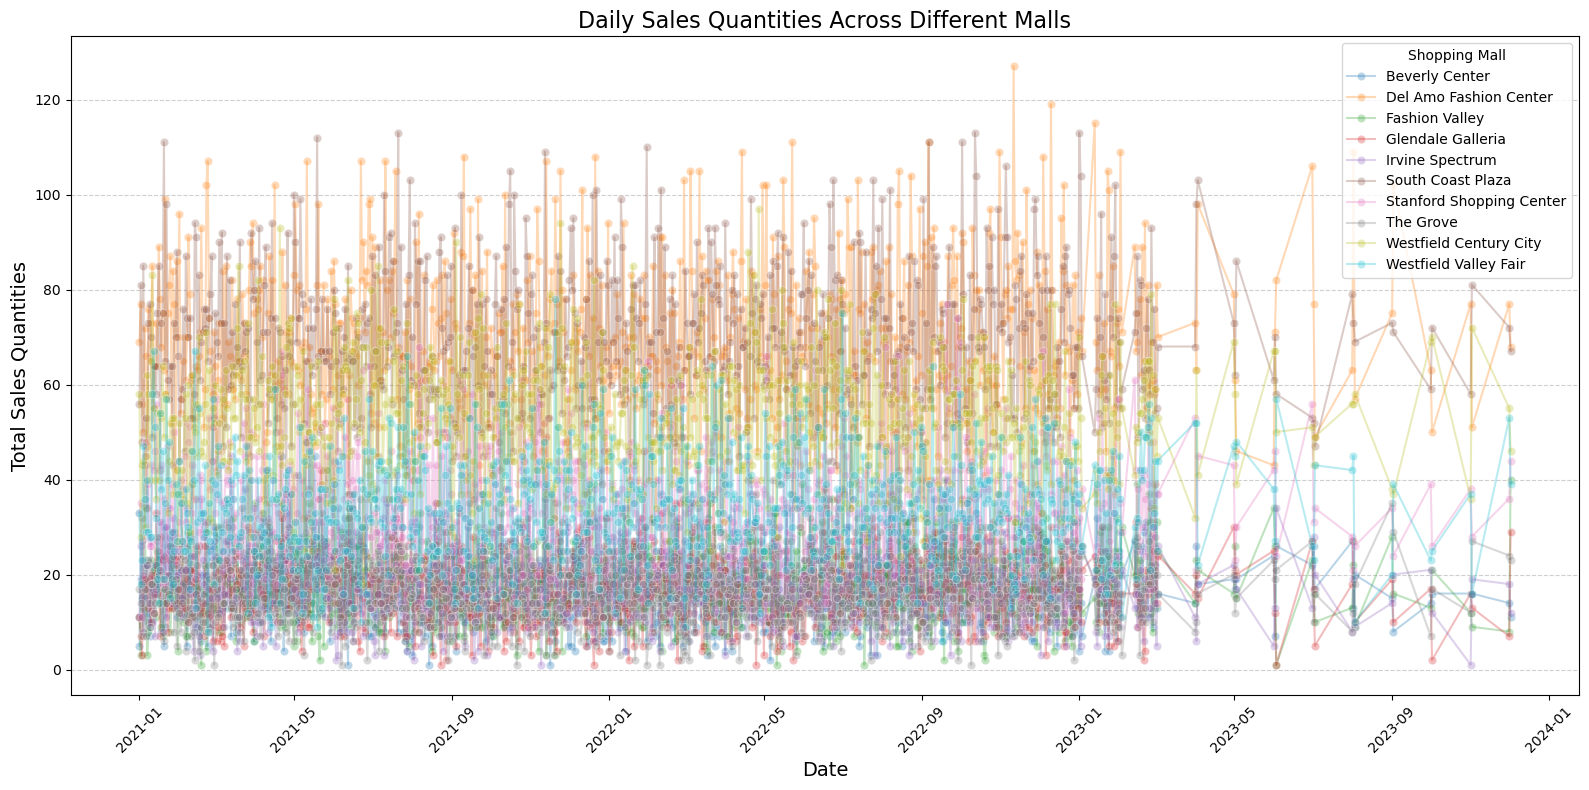

In [ ]:
# Make an explicit copy before modification to avoid the warning
sales_data_without_outliers = sales_data_without_outliers.copy()
# Convert the 'invoice_date' column to datetime
sales_data_without_outliers.loc[:, 'invoice_date'] = pd.to_datetime(sales_data_without_outliers['invoice date'])

# Group by mall and date
daily_sales_quantity = (
    sales_data_without_outliers.groupby(['shopping_mall', 'invoice_date'])
    .agg(total_sales=('quantity', 'sum'))
    .reset_index()
)

# Plot daily sales trends
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=daily_sales_quantity, 
    x='invoice_date', 
    y='total_sales', 
    hue='shopping_mall',
    marker='o',
    alpha=0.3
)

# Customize the plot
plt.title('Daily Sales Quantities Across Different Malls', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Quantities', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Shopping Mall', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

No obvisous trend, but Del Amo Fashion Center, South Coast Plaza, and Westfield Century City are tend to have more sales quantities throughout the years.

Merge the Sales and Customer tables by customer_id and create pairwise scatter plots to visualize relationships between spending and explanation variables like the attributes of the mall and customer’s demographic factors.

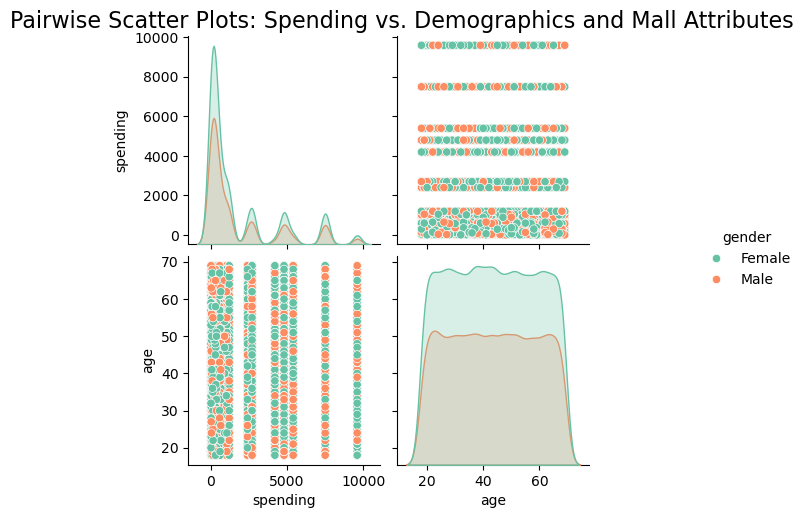

In [ ]:
# Convert categorical variables directly on the copy with .loc
sales_data_without_outliers = sales_data_without_outliers.copy() # Make an explicit copy to avoid warnings

# Calculate total spending per transaction
sales_data_without_outliers['spending'] = sales_data_without_outliers['quantity'] * sales_data_without_outliers['price']

# Merge Sales and Customer tables on 'customer_id'
merged_data = pd.merge(sales_data_without_outliers, customer_data, on='customer_id', how='inner')

# Select columns and convert categorical variables directly
scatter_data = merged_data[[
    'spending',       # Target variable: spending
    'age',            # Customer demographic
    'gender',         # Customer demographic (categorical)
    'payment_method', # Customer demographic (categorical)
    'shopping_mall'   # Mall variable (categorical)
]].copy()  # Explicitly create a copy to avoid the warning

# Encoding categorical variables for visualization
scatter_data.loc[:, 'gender'] = scatter_data['gender'].astype('category')
scatter_data.loc[:, 'payment_method'] = scatter_data['payment_method'].astype('category')
scatter_data.loc[:, 'shopping_mall'] = scatter_data['shopping_mall'].astype('category')

# Visualize pairwise relationships
sns.pairplot(
    scatter_data,
    diag_kind='kde',  # Kernel Density Estimation on diagonal
    hue='gender',     # Color points by gender
    palette='Set2',   # Color palette for clarity
)

# Customize the plot
plt.suptitle("Pairwise Scatter Plots: Spending vs. Demographics and Mall Attributes", y=1.02, fontsize=16)
plt.show()

? Merge the Sales and Shopping Mall tables and, using geographic data, visualize sales figures on a California map in the form of heatmaps or other appropriate visualizations.

In [ ]:
# Merge Sales and Shopping Mall tables on 'shopping_mall'
merged_data = pd.merge(sales_data_without_outliers, shopping_mall_data, on='shopping_mall', how='inner')

# Aggregate total sales by shopping mall
sales_by_mall = merged_data.groupby(['shopping_mall', 'location'])['spending'].sum().reset_index()

# # Add approximate geographic coordinates for each location
# mall_coordinates = {
#     'San Francisco': [37.7749, -122.4194], # Replace with actual lat/lon
#     'Los Angeles': [34.0522, -118.2437], # Replace with actual lat/lon
#     'San Diego': [32.7157, -117.1611], # Replace with actual lat/lon
#     # Add coordinates for other cities as needed
# }.copy()

# ...

Conduct a hypothesis test on the mean value of figures from shopping malls in different metropolitan areas.

In [ ]:
# Filter data for two metropolitan areas
cm_sales = sales_by_mall[sales_by_mall['location'] == 'Costa Mesa']['spending']
tor_sales = sales_by_mall[sales_by_mall['location'] == 'Torrance']['spending']

# # Check for normality
# _, cm_pvalue_normality = stats.shapiro(cm_sales)
# _, tor_pvalue_normality = stats.shapiro(tor_sales)

# print(f"Costa Mesa sales normality test p-value: {cm_pvalue_normality}")
# print(f"Torrance sales normality test p-value: {tor_pvalue_normality}")

# # Check for equal variances
# _, pvalue_var_equal = stats.levene(cm_sales, tor_sales)
# print(f"Levene's test p-value for equal variance: {pvalue_var_equal}")

# # Perform the two-sample t-test
# equal_var = pvalue_var_equal > 0.05  # Assume equal variance if Levene's test p-value > 0.05
# t_stat, p_value = stats.ttest_ind(cm_sales, tor_sales, equal_var=equal_var)

# print("\nT-Test Results:")
# print(f"t-statistic: {t_stat}")
# print(f"p-value: {p_value}")

# # Interpretation
# alpha = 0.05
# if p_value < alpha:
#     print("Reject the null hypothesis: There is a significant difference in mean sales figures.")
# else:
#     print("Fail to reject the null hypothesis: No significant difference in mean sales figures.")

Conduct a hypothesis test on sales for the same mall across different months or years. A possible approach is association tests implemented by stats.f_oneway.

Develop a predictive model for customer spending based on mall-specific information and customers’ demographic attributes. A possible approach is a linear regression model implemented by stats.lingress.

## 4. Discussions and Conclusions

## References